<a href="https://colab.research.google.com/github/tarun170104/FML_Tarun/blob/main/fml_univarient_regression%20on%20company%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

t=pd.read_csv("Company_data.csv")
t.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
x = t.drop('Sales', axis=1).values
y = t['Sales'].values

In [11]:
x_t = x[:, 2]

In [12]:
type(x_t),type(y)

(numpy.ndarray, numpy.ndarray)

In [13]:
x_t.shape,y.shape

((200,), (200,))

In [14]:
x_t=x_t.reshape(-1,1)
y=y.reshape(-1,1)

In [15]:
x_t.shape,y.shape

((200, 1), (200, 1))

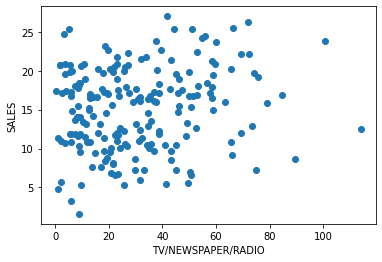

In [16]:
plt.scatter(x_t,y)
plt.xlabel('TV/NEWSPAPER/RADIO')
plt.ylabel('SALES')
plt.show()

#NO REGULARIZATION

In [21]:
reg = linear_model.LinearRegression()
reg.fit(x_t, y)

LinearRegression()

In [25]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(x_t)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')

MAE = 4.3670510624236485
MSE = 27.086772697557045
RMSE = 5.204495431601131
R_2 = 0.024951369862864836


#L1 REGULARIZATION

In [27]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [29]:
x_train.shape,y_train.shape

((150, 3), (150, 1))

In [30]:
reg_1= Lasso(alpha = 0.1)
reg_1.fit(x_train, y_train)

Lasso(alpha=0.1)

In [32]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg_1.predict(x_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')

Performance of the model on training data :

MAE = 1.2876536180415137
MSE = 2.835300199761751
RMSE = 1.6838349680897327
R_2 = 0.8957740741508459


In [33]:
y_pred2 = reg_1.predict(x_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')
     

Performance of the model on test data :

MAE = 1.1199317132206692
MSE = 2.4064594583927716
RMSE = 1.5512767188328367
R_2 = 0.911476780577433


In [36]:
reg_1.score(x_test, y_test)

0.911476780577433

#L2 REGULARIZATION

In [37]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [38]:
reg_2=Ridge(alpha=0.1)
reg_2.fit(x_train,y_train)

Ridge(alpha=0.1)

In [40]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
t_pred1 = reg_2.predict(x_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, t_pred1)}')
print(f'MSE = {mean_squared_error(y_train, t_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, t_pred1))}')
print(f'R_2 = {r2_score(y_train, t_pred1)}')
     

Performance of the model on training data :

MAE = 1.2867991281457907
MSE = 2.8352482144356674
RMSE = 1.6838195314331246
R_2 = 0.8957759851367592


In [42]:
t_pred2 = reg_2.predict(x_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, t_pred2)}')
print(f'MSE = {mean_squared_error(y_test, t_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, t_pred2))}')
print(f'R_2 = {r2_score(y_test, t_pred2)}')

Performance of the model on test data :

MAE = 1.1199949043744202
MSE = 2.4040713884290743
RMSE = 1.550506816634185
R_2 = 0.9115646273270035


In [44]:
reg_2.score(x_test, y_test)

0.9115646273270035